# Atividade Avaliativa 3 - Hands-On

Na Atividade Avaliativa 3 as equipes devem desenvolver de maneira autônoma todas as etapas de
um projeto envolvendo Aprendizado de Máquina Supervisionado utilizando Redes Neurais Artificiais
como modelo de referência, a citar:
1. Coleta e preparação de dados;
2. Análise exploratória da base de dados;
3. Determinação da tarefa de Aprendizado de Máquina;
4. Determinação da abordagem de validação cruzada a ser adotada e das métricas de desempenho
a serem aferidas, com justificativa que corroborem as escolhas efetuadas;

5. Elaboração de uma grade de busca de modelos, parâmetros e hiperparâmetros nas Redes Neurais Artificiais;

6. Treinamento e teste dos modelos;
7. Análise qualitativa e quantitativa de desempenho dos modelos avaliados.

## Bibliotecas

A primeira cécula do notebook é normalmente usada para importação de bibliotecas.

In [ ]:
#Importando bibliotecas

import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import time
from prettytable import PrettyTable
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.utils.multiclass import unique_labels
from xgboost import XGBClassifier

## 1. Coleta e preparação de dados

Nesta etapa, realizaremos a importação do conjunto de dados.**negrito**

Dataset escolhido: Wine Quality. Predizer a qualidade de vinhos a partir de atributos.
>Disponível em: <https://archive.ics.uci.edu/ml/datasets/Wine+Quality>

In [ ]:
# Baixando os arquivos

if not os.path.exists('winequality-red.csv'):
    !wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

if not os.path.exists('winequality-white.csv'):
    !wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

--2024-07-30 02:35:39--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘winequality-red.csv’

winequality-red.csv     [ <=>                ]  82.23K   439KB/s    in 0.2s    

2024-07-30 02:35:39 (439 KB/s) - ‘winequality-red.csv’ saved [84199]

--2024-07-30 02:35:39--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘winequality-white.csv’

winequality-white.c     [   <=>              ] 258.23K   467KB/s    in 0.6s    

2024-07-30

In [ ]:
# Visualização do dataset de vinhos vermelhos

red_wine = pd.read_csv('winequality-red.csv', sep=';')
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# Removendo dados faltantes caso existam

print(red_wine.isna().any())
red_wine.dropna(inplace=True)

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool


In [ ]:
# Visualização do dataset de vinhos brancos

white_wine = pd.read_csv('winequality-white.csv', sep=';')
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
# Removendo dados faltantes caso existam

print(white_wine.isna().any())
white_wine.dropna(inplace=True)

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool


## 2. Análise exploratória da base de dados

Número de exemplos nos datasets

In [ ]:
# Imprimindo o número de exemplos de cada dataset

print(f"O dataset de vinhos vermelhos tem {len(red_wine)} exemplos")
print(f"O dataset de vinhos brancos tem {len(white_wine)} exemplos")

O dataset de vinhos vermelhos tem 1599 exemplos
O dataset de vinhos brancos tem 4898 exemplos


Atributos do dataset e seus tipos

In [ ]:
# Informações do dataset red_wine

red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
# Informação do dataset white_wine

white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


Analisando a distribuição de atributos preditores

In [ ]:
def describe_table(data):
  description = data.describe()

  min_values = description.loc['min']
  max_values = description.loc['max']
  mean_values = description.loc['mean']

  summary_df = pd.DataFrame({
    'Min': min_values,
    'Max': max_values,
    'Mean': mean_values
  })

  table = PrettyTable()
  table.field_names = ["Attribute", "Min", "Max", "Mean"]

  for row in summary_df.itertuples():
    table.add_row([row.Index, row.Min, row.Max, round(row.Mean, 2)])

  print(table)


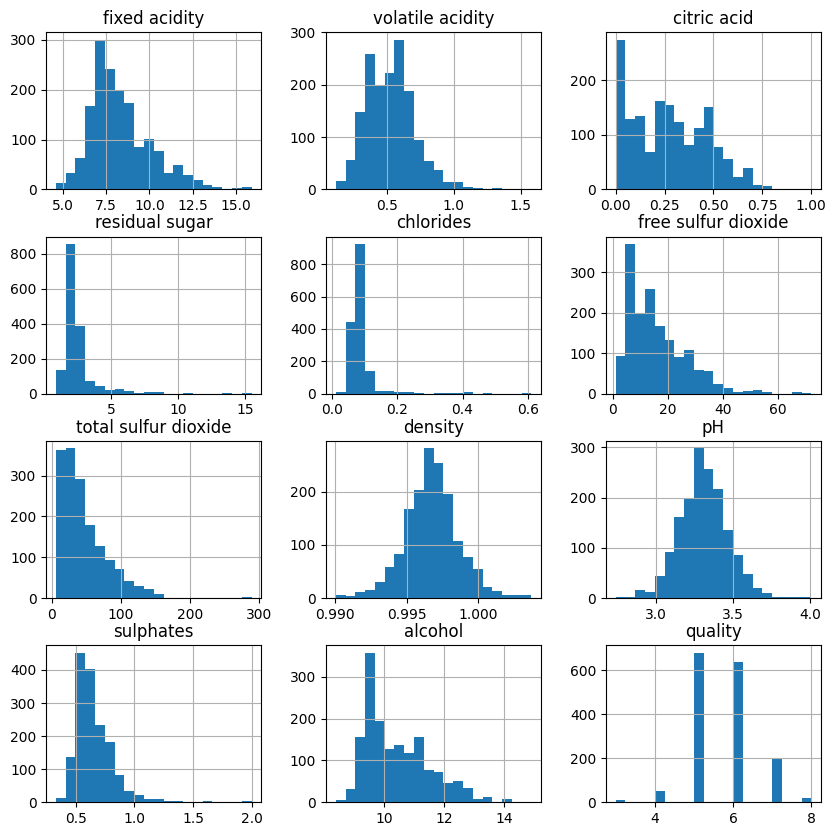

In [ ]:
# Distribuição dos dados de red_wine

red_wine.hist(bins=20, figsize=(10, 10))
plt.show()

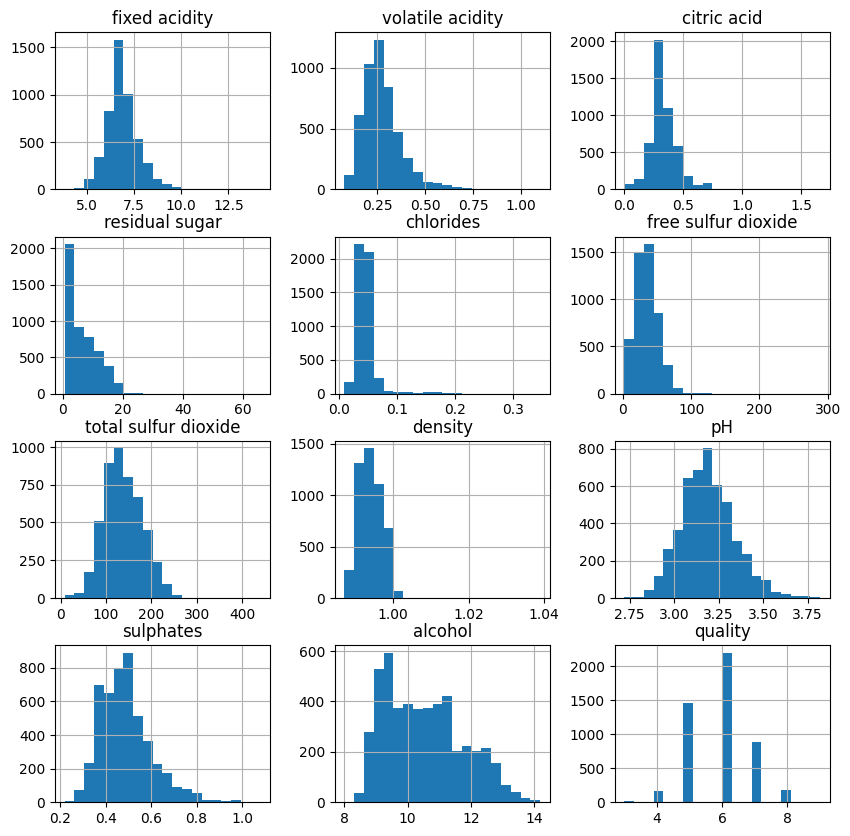

In [ ]:
# Distribuição dos dados de white_wine

white_wine.hist(bins=20, figsize=(10, 10))
plt.show()

Após a análise da distribuição de atributos, devido a baixa quantidade de exemplos com atruibuto *quality* < 5, tais exemplos serão removidos.

In [ ]:
red_wine = red_wine[red_wine['quality'] >= 5]
white_wine = white_wine[white_wine['quality'] >= 5]

In [ ]:
describe_table(red_wine)

+----------------------+---------+---------+-------+
|      Attribute       |   Min   |   Max   |  Mean |
+----------------------+---------+---------+-------+
|    fixed acidity     |   4.7   |   15.9  |  8.34 |
|   volatile acidity   |   0.12  |   1.33  |  0.52 |
|     citric acid      |   0.0   |   0.79  |  0.27 |
|    residual sugar    |   0.9   |   15.5  |  2.53 |
|      chlorides       |  0.012  |  0.611  |  0.09 |
| free sulfur dioxide  |   1.0   |   72.0  | 16.03 |
| total sulfur dioxide |   6.0   |  289.0  | 46.96 |
|       density        | 0.99007 | 1.00369 |  1.0  |
|          pH          |   2.86  |   4.01  |  3.31 |
|      sulphates       |   0.37  |   1.98  |  0.66 |
|       alcohol        |   8.4   |   14.9  | 10.43 |
|       quality        |   5.0   |   8.0   |  5.71 |
+----------------------+---------+---------+-------+


In [ ]:
describe_table(white_wine)

+----------------------+---------+---------+--------+
|      Attribute       |   Min   |   Max   |  Mean  |
+----------------------+---------+---------+--------+
|    fixed acidity     |   3.8   |   14.2  |  6.84  |
|   volatile acidity   |   0.08  |  0.965  |  0.27  |
|     citric acid      |   0.0   |   1.66  |  0.34  |
|    residual sugar    |   0.6   |   65.8  |  6.45  |
|      chlorides       |  0.009  |  0.346  |  0.05  |
| free sulfur dioxide  |   2.0   |  131.0  | 35.64  |
| total sulfur dioxide |   9.0   |  344.0  | 138.68 |
|       density        | 0.98711 | 1.03898 |  0.99  |
|          pH          |   2.72  |   3.82  |  3.19  |
|      sulphates       |   0.22  |   1.08  |  0.49  |
|       alcohol        |   8.0   |   14.2  | 10.53  |
|       quality        |   5.0   |   9.0   |  5.96  |
+----------------------+---------+---------+--------+


Analisando a correlação dos atributos

fixed acidity           0.117889
volatile acidity       -0.341017
citric acid             0.209150
residual sugar          0.026576
chlorides              -0.128728
free sulfur dioxide    -0.097014
total sulfur dioxide   -0.252287
density                -0.199512
pH                     -0.016129
sulphates               0.251410
alcohol                 0.521886
quality                 1.000000
Name: quality, dtype: float64


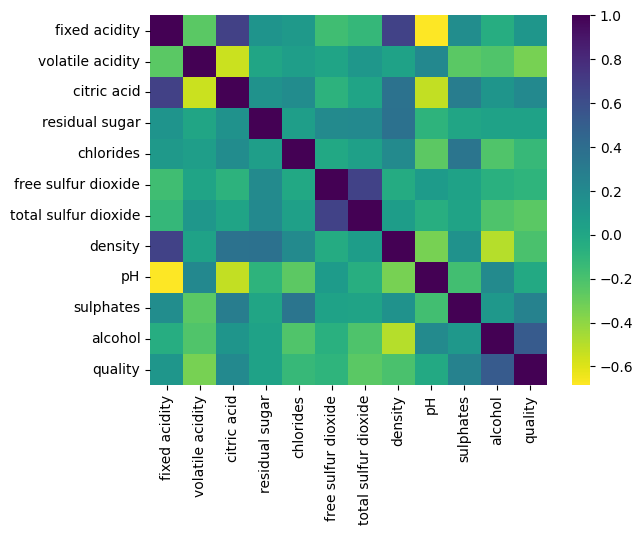

In [ ]:
# Correlação de atributos no dataset red_wine
red_wine_corr = red_wine.corr()
sns.heatmap(red_wine_corr, cmap='viridis_r')
print(red_wine_corr['quality'])

## 3. Determinação da tarefa de Aprendizado de Máquina

A tarefa de classificação envolve prever a categoria à qual uma nova observação pertence, com base em um conjunto de dados de treinamento que contém observações cuja categoria é conhecida.

Para o dataset de qualidade de vinhos, a variável alvo é a qualidade do vinho, que varia de 1 a 10, onde 1 indica a pior qualidade e 10 indica a melhor qualidade. A qualidade do vinho é um atributo categórico e ordinal, fazendo com que a classificação seja uma escolha natural.

## 4. Determinação da abordagem de validação cruzada a ser adotada e das métricas de desempenho a serem aferidas, com justificativa que corroborem as escolhas efetuadas

Para Validação Cruzada (*Cross-Validation*) usaremos a K-Folds Estratificada, usada como padrão no método *GridSearchCV*, pois essa abordagem preserva a distribuição de classes do conjunto original e dessa forma evita

Para as métricas de desempenho:

1. Acurácia: Mede a proporção de previsões corretas em relação ao total de amostras. É uma métrica global simples e nos permite ter uma ideia geral do modelo.

2. Classification Report: Fornece uma visão detalhada do desempenho do modelo, incluindo precisão (*precision*), revocação (*recall*) e *F1-score* para cada classe, além de uma média ponderada dessas métricas. Isso permite uma avaliação mais completa, especialmente em cenários com classes desbalanceadas.

3. Matriz de Confusão: Fornece uma representação visual dos erros de classificação, mostrando quais classes são mais frequentemente confundidas pelo modelo. Isso ajuda a identificar padrões de erro específicos que podem ser ajustados.

In [ ]:
# Separando os atributos preditores do atributo alvo

X_red = red_wine.drop('quality', axis=1)
y_red = red_wine['quality']

X_white = white_wine.drop('quality', axis=1)
y_white = white_wine['quality']

In [ ]:
# Realizando o escalonamento dos dados

scaller = StandardScaler()
X_red_scalled = scaller.fit_transform(X_red)
X_white_scalled = scaller.fit_transform(X_white)

In [ ]:
# Dividindo os dados em treino e teste

X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(X_red_scalled, y_red, test_size=0.2)
X_white_train, X_white_test, y_white_train, y_white_test = train_test_split(X_white_scalled, y_white, test_size=0.2)

In [ ]:
print(len(X_red_train))
print(len(X_red_test))
print(len(X_white_train))
print(len(X_white_test))

1228
308
3772
943


In [ ]:
# Criando variáveis que possuam dados de treino de ambos os datasets

X_train = np.concatenate((X_red_train, X_white_train), axis=0)
y_train = np.concatenate((y_red_train, y_white_train), axis=0)

## 5. Elaboração de uma grade de busca de modelos, parâmetros e hiperparâmetros nas Redes Neurais Artificiais

In [ ]:
def grid(model, param_grid, X, y):

  # Realizando a busca em grade
  grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, return_train_score=True)
  grid_search.fit(X, y)

  results = pd.DataFrame(grid_search.cv_results_)
  results = results[['params', 'mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score']]
  print(results)

  # Melhor modelo e seu score
  print("Melhor modelo: ", grid_search.best_params_)
  print("Melhor score ", grid_search.best_score_)

  return grid_search.best_estimator_


In [ ]:
# Definindo o modelo e parâmetros a serem testatados para MLP

mlp = MLPClassifier(max_iter=100)
param_grid_mlp = {
    'hidden_layer_sizes': [(100,), (150,), (100, 100), (100, 150)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.01, 0.05, 0.5],
    'learning_rate': ['constant', 'adaptive'],
}

mlp_best = grid(mlp, param_grid_mlp, X_train, y_train)

                                               params  mean_test_score  \
0   {'activation': 'tanh', 'alpha': 0.01, 'hidden_...           0.5602   
1   {'activation': 'tanh', 'alpha': 0.01, 'hidden_...           0.5558   
2   {'activation': 'tanh', 'alpha': 0.01, 'hidden_...           0.5616   
3   {'activation': 'tanh', 'alpha': 0.01, 'hidden_...           0.5572   
4   {'activation': 'tanh', 'alpha': 0.01, 'hidden_...           0.5614   
..                                                ...              ...   
91  {'activation': 'relu', 'alpha': 0.5, 'hidden_l...           0.5630   
92  {'activation': 'relu', 'alpha': 0.5, 'hidden_l...           0.5672   
93  {'activation': 'relu', 'alpha': 0.5, 'hidden_l...           0.5644   
94  {'activation': 'relu', 'alpha': 0.5, 'hidden_l...           0.5676   
95  {'activation': 'relu', 'alpha': 0.5, 'hidden_l...           0.5598   

    std_test_score  mean_train_score  std_train_score  
0         0.008471           0.56885         0.002813  

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Definindo o modelo e parâmetros a serem testados para SVM

svm = SVC()
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
}

svm_best = grid(svm, param_grid_svm, X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


                                               params  mean_test_score  \
0    {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}           0.5506   
1       {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}           0.5536   
2   {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}           0.5258   
3     {'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}           0.5506   
4        {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}           0.5540   
5    {'C': 0.1, 'gamma': 'auto', 'kernel': 'sigmoid'}           0.5290   
6      {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}           0.5516   
7         {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}           0.5714   
8     {'C': 1, 'gamma': 'scale', 'kernel': 'sigmoid'}           0.4660   
9       {'C': 1, 'gamma': 'auto', 'kernel': 'linear'}           0.5516   
10         {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}           0.5722   
11     {'C': 1, 'gamma': 'auto', 'kernel': 'sigmoid'}           0.4642   
12    {'C': 10, 'gamma': 'scale', 'ker

In [ ]:
# Definindo o modelo e parâmetros a serem testados para XGBoost

xgb = XGBClassifier(n_estimators = 100)
param_grid_xgb = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 6],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

xgb_best = grid(xgb, param_grid_xgb, X_train, y_train_encoded)

                                               params  mean_test_score  \
0   {'colsample_bytree': 0.8, 'learning_rate': 0.0...           0.5606   
1   {'colsample_bytree': 0.8, 'learning_rate': 0.0...           0.5588   
2   {'colsample_bytree': 0.8, 'learning_rate': 0.0...           0.5964   
3   {'colsample_bytree': 0.8, 'learning_rate': 0.0...           0.5950   
4   {'colsample_bytree': 0.8, 'learning_rate': 0.1...           0.5822   
5   {'colsample_bytree': 0.8, 'learning_rate': 0.1...           0.5846   
6   {'colsample_bytree': 0.8, 'learning_rate': 0.1...           0.6320   
7   {'colsample_bytree': 0.8, 'learning_rate': 0.1...           0.6238   
8   {'colsample_bytree': 1.0, 'learning_rate': 0.0...           0.5596   
9   {'colsample_bytree': 1.0, 'learning_rate': 0.0...           0.5570   
10  {'colsample_bytree': 1.0, 'learning_rate': 0.0...           0.5942   
11  {'colsample_bytree': 1.0, 'learning_rate': 0.0...           0.5842   
12  {'colsample_bytree': 1.0, 'learnin

## 6. Treinamento e teste dos modelos

In [ ]:
# Função para criação da matriz de confusão

def conf_matrix(y_true, y_pred, title, y_label=None):
  if y_label is None:
    labels = unique_labels(y_true)

  else:
    labels = unique_labels(y_label)

  valid_classes = np.unique(y_true)
  y_pred_adjusted = np.array([y if y in valid_classes else -1 for y in y_pred])

  # Criar a matriz de confusão com as classes válidas
  columns = [f"Predicted {label}" for label in labels]
  indices = [f"Actual {label}" for label in labels]

  df = pd.DataFrame(confusion_matrix(y_true, y_pred_adjusted, labels=valid_classes), columns=columns, index=indices)
  plt.figure(figsize=(10, 7))
  ax = sns.heatmap(df, annot=True, cmap='viridis_r')
  ax.set_title(title)
  plt.show()


In [ ]:
# Função para avaliar e retornar as métricas do modelo

def evaluate_model(X_train, X_test, y_train, y_test, model, title, targets):
  start_train_time = time.time()
  model.fit(X_train, y_train)
  end_train_time = time.time()
  training_time = end_train_time - start_train_time

  y_pred = model.predict(X_test)

  report = classification_report(y_test, y_pred, output_dict=True)
  accuracy = report['accuracy']
  macro_avg = report['macro avg']

  return (accuracy, macro_avg['precision'], macro_avg['recall'], macro_avg['f1-score'], training_time), conf_matrix(y_test, y_pred, title, y_label=targets)

In [ ]:
# Cria a tabela de resultados e suas matrizes de confusão

def results_table(X_red_train, X_red_test, y_red_train, y_red_test, X_white_train, X_white_test, y_white_train, y_white_test, model, red_targets=None, white_targets=None):

    # Avaliando o modelo para os dados "red" e "white"
    red_results, red_matrix = evaluate_model(X_red_train, X_red_test, y_red_train, y_red_test, model, "Red Wine Matrix", red_targets)
    white_results, white_matrix = evaluate_model(X_white_train, X_white_test, y_white_train, y_white_test, model, "White Wine Matrix", white_targets)

    # Criando a tabela com PrettyTable
    table = PrettyTable()
    table.field_names = ["Metrics", "Red", "White"]

    metrics = ["Accuracy", "Macro Avg Precision", "Macro Avg Recall", "Macro Avg F1-Score", "Training Time (s)"]

    for i, metric in enumerate(metrics):
        table.add_row([metric, round(red_results[i], 2), round(white_results[i], 2)])

    return table, red_matrix, white_matrix

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in

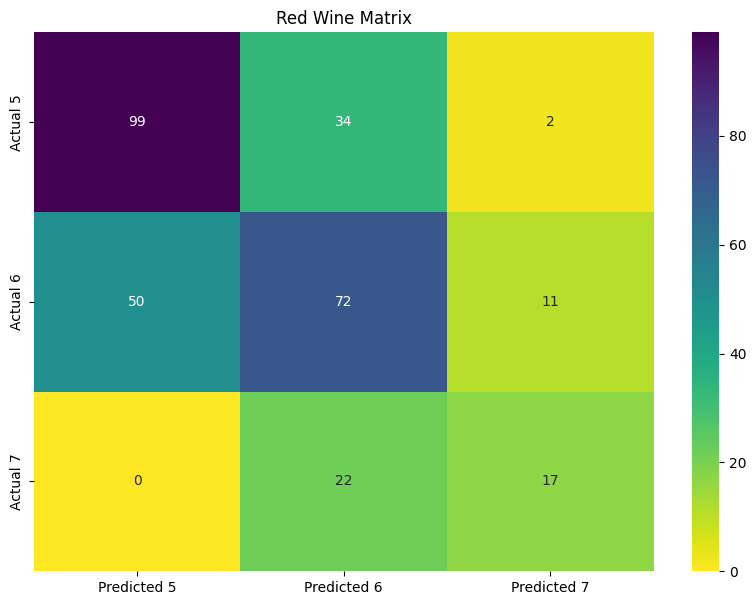

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


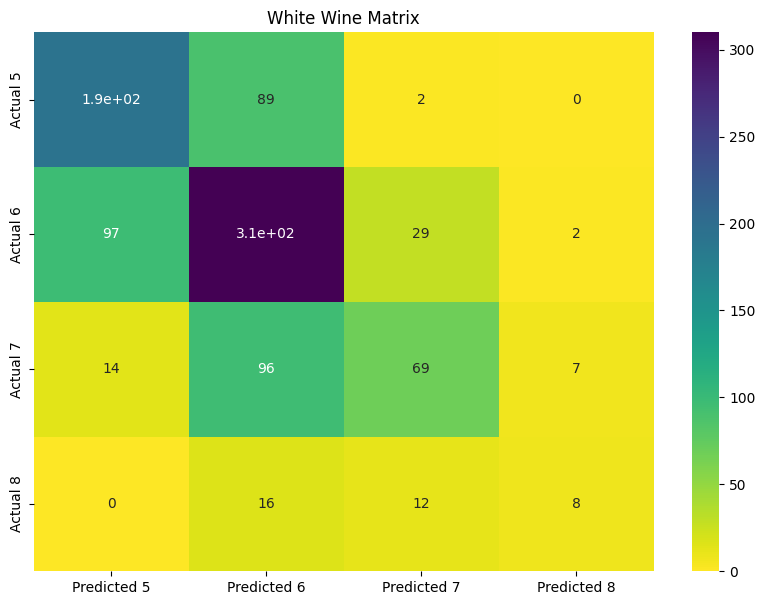

+---------------------+------+-------+
|       Metrics       | Red  | White |
+---------------------+------+-------+
|       Accuracy      | 0.61 |  0.61 |
| Macro Avg Precision | 0.45 |  0.58 |
|   Macro Avg Recall  | 0.42 |  0.49 |
|  Macro Avg F1-Score | 0.43 |  0.52 |
|  Training Time (s)  | 1.87 |  7.53 |
+---------------------+------+-------+


In [ ]:
# Resultados para o modelo MLP

table, red_matrix, white_matrix = results_table(X_red_train, X_red_test, y_red_train, y_red_test, X_white_train, X_white_test, y_white_train, y_white_test, mlp_best)
print(table)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


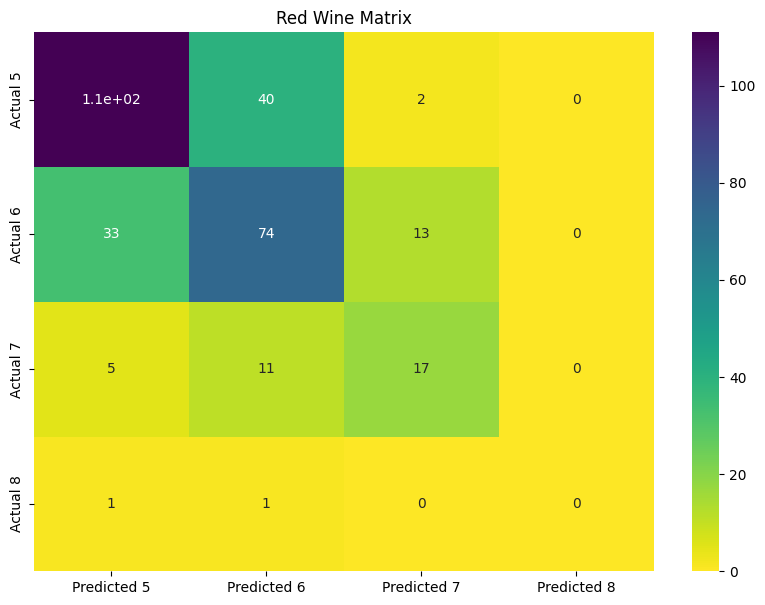

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


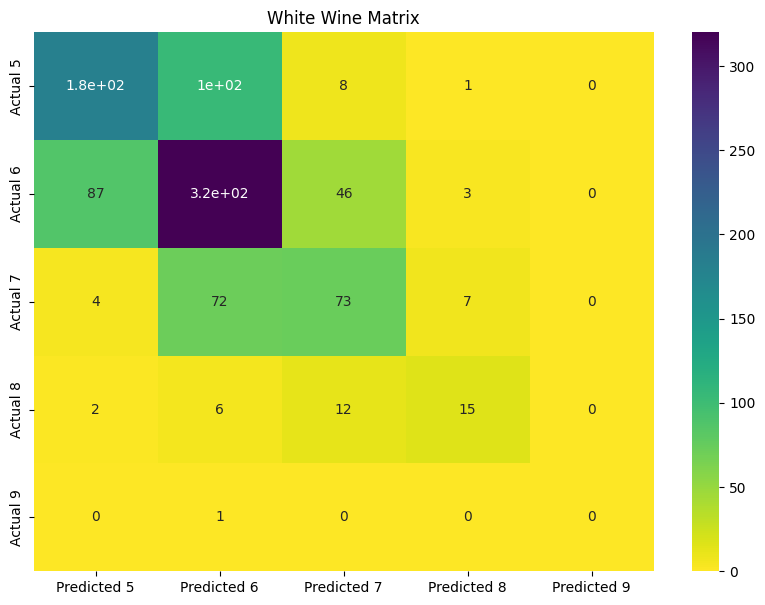

+---------------------+------+-------+
|       Metrics       | Red  | White |
+---------------------+------+-------+
|       Accuracy      | 0.66 |  0.63 |
| Macro Avg Precision | 0.46 |  0.48 |
|   Macro Avg Recall  | 0.46 |  0.44 |
|  Macro Avg F1-Score | 0.46 |  0.46 |
|  Training Time (s)  | 0.35 |  3.5  |
+---------------------+------+-------+


In [ ]:
# Resultados para o modelo SVM

table, red_matrix, white_matrix = results_table(X_red_train, X_red_test, y_red_train, y_red_test, X_white_train, X_white_test, y_white_train, y_white_test, svm_best)
print(table)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


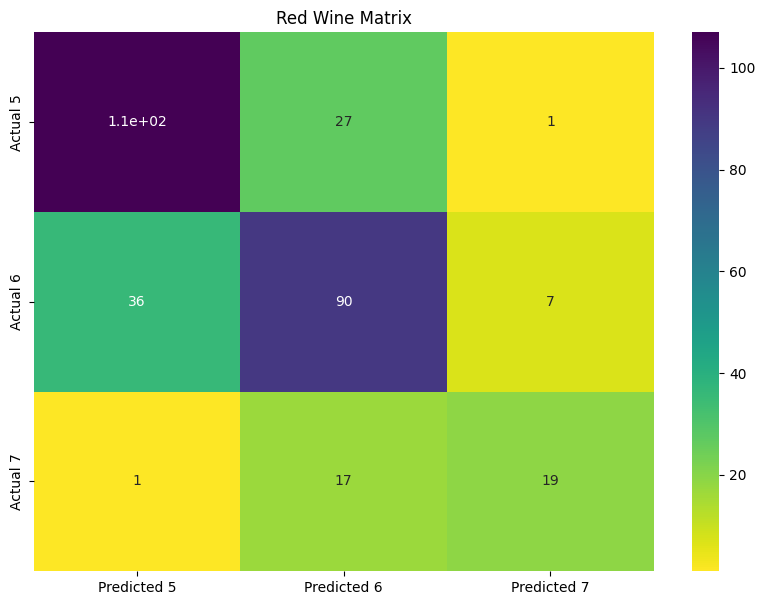

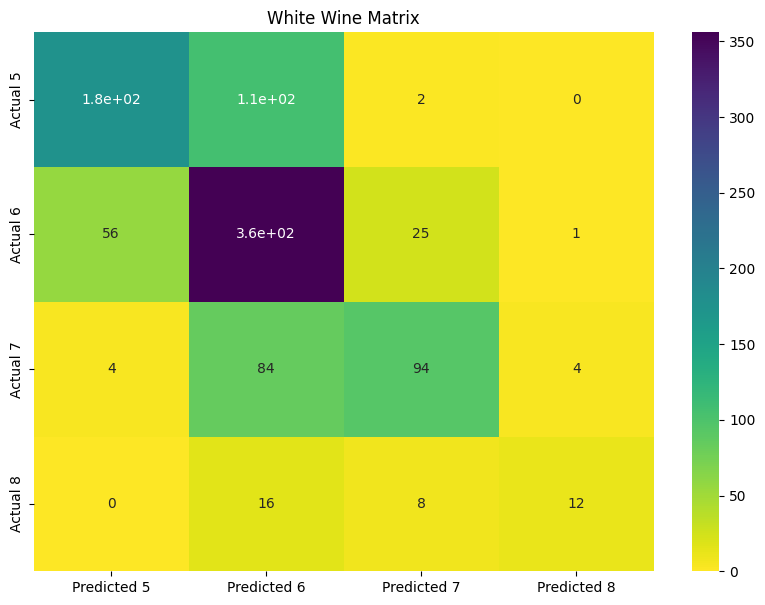

+---------------------+------+-------+
|       Metrics       | Red  | White |
+---------------------+------+-------+
|       Accuracy      | 0.7  |  0.68 |
| Macro Avg Precision | 0.53 |  0.7  |
|   Macro Avg Recall  | 0.49 |  0.57 |
|  Macro Avg F1-Score | 0.5  |  0.61 |
|  Training Time (s)  | 7.39 | 14.09 |
+---------------------+------+-------+


In [ ]:
# Resultados para o modelo XGBoost

# Encoding atributos alvo para o XGBoost

y_red_train_encoded = le.fit_transform(y_red_train)
y_red_test_encoded = le.fit_transform(y_red_test)
y_white_train_encoded = le.fit_transform(y_white_train)
y_white_test_encoded = le.fit_transform(y_white_test)

red_targets = unique_labels(y_red_test)
red_targets = [str(target) for target in red_targets]

white_targets = unique_labels(y_white_test)
white_targets = [str(target) for target in white_targets]

table, red_matrix, white_matrix = results_table(X_red_train, X_red_test, y_red_train_encoded, y_red_test_encoded, X_white_train, X_white_test, y_white_train_encoded, y_white_test_encoded, xgb_best, red_targets=red_targets, white_targets=white_targets)

print(table)

## 7. Análise qualitativa e quantitativa de desempenho dos modelos avaliados